
#### Teoría de Circuitos II

#  Tarea Semanal 2
#### Autor: Federico Rodriguez Vizzon
<img src="./ned.jpeg" align="left" width="150" /> 


## 1) Determinar la funcion transferencia de la siguiente red en funcion de $\omega_0$ y Q

 <img src="./red.png" align="left" width="600" /> 


Definimos las admitancias:

$Y_{1}= \frac{1}{R_{1}}$ 

$Y_{2}= \frac{1}{R_{2}}$ 

$Y_{c}= sC_{1}$ 

$Y_{3}= \frac{1}{R_{3}}$

$Y_{4}= \frac{1}{R_{3}}$

$Y_{4}= \frac{1}{R_{3}}$

Redibujando la red nos queda de la siguiente forma:

<img src="./circuito_en_admitancias.jpg" align="left" width="600" /> 


Adoptamos los nodos $V_{a}$ y $V_{b}$ de la siguiente forma

$V_{a}$ en el nodo entre $Y_{3}$ y $Y_{2}/Y_{c}$

$V_{b}$ en el nodo entre $Y_{4}$ y $Y_{c}$

Planteamos las ecuaciones de nodos

$V_1Y_1 = -V_{a}(Y_2 + Y_{c}) -V_oY_3$ (1)

$V_a Y_3 = -V_{b} Y_{c}$ (2)

$V_{b} Y_4 = -V_o Y_4 \implies V_{b} = -V_o$ (3)

Reemplazando (3) en (2) y operando

$V_a Y_3 = (-1)(-V_o)Y_c \implies V_a = \frac{V_oY_c}{Y_3}$ (4)

Reemplazando (4) en (1) y operamos.

$V_1Y_1 = -V_o\frac{Y_c}{Y_3}(Y_2+Y_c) - V_oY_3$ 

$V_1Y_1 = -V_o (\frac{Y_cY_2 + Y_c^2 + Y_3^2}{Y_3})$

$V_1 = -V_o (\frac{Y_cY_2 + Y_c^2 + Y_3^2}{Y_3Y_1})$

$\frac{V_o}{V_1} = -\frac{Y_3Y_1}{Y_cY_2 + Y_c^2 + Y_3^2}$ (5)

Asi llegamos a la funcion transferencia en funcion de las admintacias.
Se puede observar que depende de todos lo componentes presentes en la red a excepcion de $Y_4$ 
la ausencia de este componente en la funcion transferencia se explica en la obtencion de la ecuacion (3).

Reemplazando en (5) los valores de las admitancias se obtiene la siguiente $T(S)$

$\frac{V_o}{V_1} = -\frac{\frac{1}{R_3R_1}}{\frac{SC}{R_2} + S^2C^2 + \frac{1}{R_3^2}}$

Ordenamos lo coeficientes y lo expresamos de forma monica

$\frac{V_o}{V_1} = -\frac{\frac{1}{R_3R_1C^2}}{S^2 + S\frac{1}{R_2C} +\frac{1}{R_3^2C^2}}$

$\omega_o^2 = \frac{1}{R_3^2C^2} \implies \omega_o = \frac{1}{R_3C}$

Multiplicando al numerador y al denominador por $\frac{R_3}{R_3}$ nos queda 

$\frac{V_o}{V_1} = -\frac{\frac{R_3}{R_1R_3R_3C^2}}{S^2 + S\frac{R_3}{R_2R_3C} +\frac{1}{R_3^2C^2}}$

si $\omega_o = \frac{1}{R_3C}$

$\frac{V_o}{V_1} = -\frac{\frac{R_3}{R_1}\omega_o^2}{S^2 + S\frac{R_3}{R_2}\omega_o +\omega_o^2}$

$\frac{V_o}{V_1} = -\frac{R_3}{R_1}\frac{\omega_o^2}{S^2 + S\frac{R_3}{R_2}\omega_o +\omega_o^2}$ 

El termino de primer orden es $\frac{omega_o}{Q} = \frac{R_3}{R_2}\omega_o \implies Q = \frac{R_2}{R_3}$ (6) y la transferencia en funcion de Q y $\omega_o$ queda: 

$\frac{V_o}{V_1} = -\frac{R_3}{R_1}\frac{\omega_o^2}{S^2 + S\frac{\omega_o}{Q} + \omega_o^2}$

## 2) Determinar los valores de los componentes para $\omega_o = 1 \land Q = 3$

$R_4$ no participa en el calculo de los valores de interes, adoptamos un valor standar para ella $R_4 = 470K\Omega$

$\omega_o = \frac{1}{R_3C}$

Definimos $R_3 = 470K\Omega$ 

$\omega_o = 1 = \frac{1}{470K*C} \implies C = \frac{1}{470K}$

In [1]:
r_3 = 470 * 1000
c = 1/r_3
c

2.1276595744680853e-06

$C = 2.12\mu F$

Recordando la ecuacion (6) $Q = \frac{R_2}{R_3}$ y reemplazando por los valores ya obtenidos

$Q = \frac{R_2}{R_3} \implies R_2 = Q\times R_3$

In [2]:
q = 3
r_2 = q*r_3
r_2

1410000

$R_2 = 1.41 M\Omega$

Con estos valores la transferencia queda:

$\frac{V_o}{V_1} = -\frac{R_3}{R_1}\frac{1}{S^2 + S\frac{1}{3} + 1}$

## 3) Obtener $R_1$ tal que $\mid T(0)\mid = 20dB$

$\mid T(0)\mid = 20\times\log{\frac{R_3}{R_1}} = 20dB \implies \log{\frac{R_3}{R_1}} = 1 \implies \frac{R_3}{R_1} = 10 \implies R_1 = \frac{R_3}{10}$


In [3]:
r_1 = r_3 / 10
r_1

47000.0

$R_1 = 47 K\Omega$

## Simulacion de la red en python para $\omega_o = 1 y Q = 3$

In [4]:
# Módulos para Python, algo parecido a los #include de C

# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

In [5]:

import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento

plt.figure(1)
plt.close(1)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# Podés modificar el ancho y alto de los gráficos que generás
fig_sz_x = 14
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})


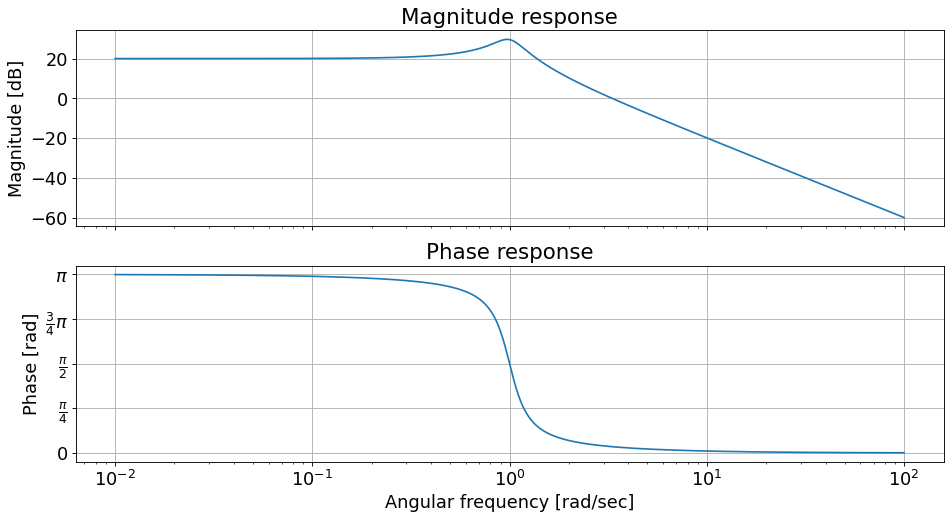

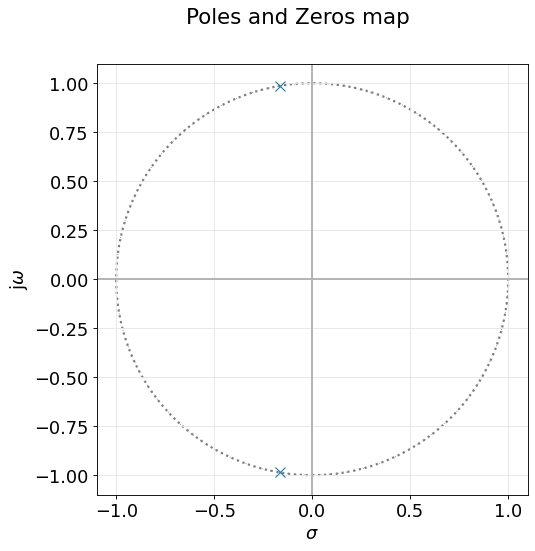

In [6]:
     
# Definimos los parámetros de la simulación

# Probar diferentes valores de Q
#################################

Q = 3
w0 = 1
k = -r_3/r_1

# Cargamos la funcion transferencia como vectores de sus coeficientes.

num = np.array([ k*(w0**2)])
den = np.array([ 1, w0/Q, w0**2])

H1 = sig.TransferFunction( num, den )
# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H1)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
#plt.sca(axes_hdl[0])
#plt.ylim([-5,5])

plt.gca

pzmap(H1)

plt.show()


#### Simulaciones de la red en spice para los valores obtenidos de $R_1, R_2, R_3, R_4$ y $C$.

 <img src="./LP_Q3_W1_20dB.png" align="left" width="700" /> 
 
 <img src="./ac_lp_q3_w1_20db.png" align="left" width="900" /> 


## Normalizacion de la red en frecuencia e impedancia

Adoptamos $\Omega_{\omega_o} = \omega_0 = \frac{1}{R_3C}$ y reemplazamos $\$ = S\omega_o$

$T(\$) = -\frac{R_3}{R_1} \frac{\omega_o^2}{\$^2\omega_o^2 + \$\frac{\omega_o\omega_o}{Q} + \omega_o^2} = -\frac{R_3}{R_1} \frac{1}{\$^2 + \$\frac{1}{Q} + 1}$ 

Recordando la ecuacion (6) $Q = \frac{R_2}{R_3}$ y reemplaznado la transferencia normalizada en $\omega_o$ queda

$T(\$) = - \frac{R_3}{R_1} \frac{1}{\$^2 + \$\frac{R_3}{R_2} + 1}$

$C^* = C\Omega_{\omega_o} = C\omega_o = C \frac{1}{CR_3} = \frac{1}{R_3}$

Los componenetes resisitivos no se ven afectados por la normalizacion en frecuencia.

Ahora procedemos a normalizar en admintacias, adoptamos $\Omega_z = R_3$ y asi nos quedan

$R_3^{**} = \frac{R_3}{\Omega_z} = \frac{R_3}{R_3} = \frac{470K}{470K} = 1$

$R_2^{**} = \frac{R_2}{\Omega_z} = \frac{R_2}{R_3} = \frac{1.41M}{470K} = 3$

$R_1^{**} = \frac{R_1}{\Omega_z} = \frac{R_1}{R_3} = \frac{47K}{470K} = 0.1$

$C^{**} = \frac{1}{\frac{R_3}{\Omega_z}} = \frac{1}{\frac{R_3}{R_3}} = 1$


### Simulacion en spice del circuito LP con los valores normalizados.


 <img src="./LP_Q3_W1_normalizado.png" align="left" width="700" /> 
 
 <img src="./AC_LP_Q3_W1_normalizado.png" align="left" width="700" /> 




## Sensibilidad
$\omega_o = \frac{1}{R_3 C}$

$S_c^{\omega_o} = \frac{C}{\omega_o} \frac{\partial\omega_o}{\partial C} = C^2 R_3 \frac{-R_3}{R_3^2 C^2} = \frac{-R_3^2C^2}{R_3^2C^2} = -1 $

$Q = \frac{R_2}{R_3}$


$S_{R_2}^{Q} = \frac{R_2}{Q} \frac{\partial Q}{\partial R_2} = \frac{R_2R_3}{R_2} \frac{1}{R_3} = \frac{R_2 R_3}{R_2 R_3} = 1$

$S_{R_3}^{Q} = \frac{R_3}{Q} \frac{\partial Q}{\partial R_3} = \frac{R_3^2}{R_2} \frac{-R_2}{R_3^2} = \frac{-R_2 R_3^2}{R_2 R_3^2} = -1$



## Obtencion de un filtro pasa banda sin modificar los componentes circuitales.

Tomando en cuenta lo visto en el ejemplo 4.6 del Schaumann si tomamos como salida el nodo $V_a$ y calculamos $\frac{V_a}{V_i}$ deberiamos obtener una funcion transferencia del tipo deseado.

Recordando el siguiente esquema procedemos a calcular la funcion transferencia deseada.

<img src="./circuito_en_admitancias.jpg" align="left" width="600" /> 


Si tomamos la ecacion (2) y escribimos $V_b(V_a)$ llegamos a:

$V_a Y_3 = -V_{b} Y_{c} \implies V_b = -V_a \frac{Y_3}{Y_c}$ (7)

Reemplazando en (3) 

$V_o = -V_b =  -V_b(V_a) = (-1)(-V_a)\frac{Y_3}{Y_c} = V_a\frac{Y_3}{Y_c}$

$V_o = V_a \frac{Y_3}{Y_c}$ (8)

(8) en (1)

$V_1Y_1 = -V_a(Y_2 + Y_c) -V_a \frac{Y_3^2}{Y_c} = -V_a (\frac{Y_c^2 + Y_2Y_c + Y_3^2}{Y_c})$

$\frac{V_a}{V_1} = -1 \frac{Y_1Y_c}{Y_c^2 + Y_cY_2 + Y_3^2}$ (9)

Reemplazando las Admintancias por los valores de los componenetes

$\frac{V_a}{V_1} = - \frac{\frac{SC}{R_1}}{S^2C + \frac{SC}{R_2} + \frac{1}{R_3^2}}$

Operamos para expresar el polinomio en forma monica

$\frac{V_a}{V_1} = - \frac{\frac{S}{R_1C}}{S^2 + \frac{S}{R_2C} + \frac{1}{R_3^2C^2}}$

Operamos un poco mas para dejarlo en funcion de $\omega_o$ y Q

$\frac{V_a}{V_1} = - \frac{\frac{SR_3}{R_1R_3C}}{S^2 + \frac{SR_3}{R_2R_3C} + \frac{1}{R_3^2C^2}}$

$\omega_o^2 = \frac{1}{R_3^2C^2} \implies \omega_o =  \frac{1}{R_3C}$

$\frac{\omega_o}{Q} = \frac{\omega_oR_3}{R_2} \implies Q = \frac{R_2}{R_3}$

Reemplanzando estos valores la transferencia queda de la siguiente forma.

$\frac{V_a}{V_1} = -\frac{R_3}{R_1}\frac{S\omega_o}{S^2 + S\frac{\omega_o}{Q} + \omega_o^2}$

Volvemos a correr la simulacion del filtro pasabajos con $Q = 3$, $\omega_o = 1$ pero incorporamos al plot la salida en el nodo $V_a$


<img src="./BP_Q3_W1.png" align="left" width="900" /> 


## Calculo de los componentes para obtener una transferencia que cumpla con Butterworth

Para cumplir con un Butterworth de orden 2 

$Q = 2\cos{\frac{\pi}{4}} = \frac{1}{\sqrt{2}}$

In [7]:
import numpy
q_butt_n2 = numpy.cos(numpy.pi/4)
q_butt_n2

0.7071067811865477

Recordando la ecuacion (6) $Q = \frac{R_2}{R_3}$ y usando el mismo valor de $R_3$ ya adoptado anteriormente calculamos el valor de $R_2$ que nos da el Q deseado

In [8]:
r_2_butt_n2 = q_butt_n2 * r_3
print(r_2_butt_n2)

332340.1871576774


## Simulacion en spice del filtro Butterworth

 <img src="./LP_BUTTER.png" align="left" width="600"/>
 <img src="./ac_LP_BUTTER.png" align="left" width="600"/>